# Proyecto - Despliegue de soluciones

## Importar librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
import xgboost as xgb

## EJECUCIÓN UNICA VEZ- TOMA MUESTRAS TODOS LOS MESES 2024

In [5]:
# Opciones comunes para la carga de archivos
opciones_carga = {
    'sep': ';',
    'encoding': 'latin1',
    'low_memory': False
}

# Cargar los archivos en DataFrames con las opciones especificadas
df_enero = pd.read_csv('Enero.csv', **opciones_carga)
df_enero.columns = df_enero.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_febrero = pd.read_csv('Febrero.csv', **opciones_carga)
df_febrero.columns = df_febrero.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_marzo = pd.read_csv('Marzo.csv', **opciones_carga)
df_marzo.columns = df_marzo.columns.str.strip().str.lower()  # Eliminar espacios y poner en minúsculas
df_abril = pd.read_csv('Abril.csv', **opciones_carga)
df_abril.columns = df_abril.columns.str.strip().str.lower()
df_mayo = pd.read_csv('Mayo.csv', **opciones_carga)
df_mayo.columns = df_mayo.columns.str.strip().str.lower()
df_junio = pd.read_csv('Junio.csv', **opciones_carga)
df_junio.columns = df_junio.columns.str.strip().str.lower()
df_julio = pd.read_csv('Julio.csv', **opciones_carga)
df_julio.columns = df_julio.columns.str.strip().str.lower()
df_agosto = pd.read_csv('Agosto.csv', **opciones_carga)
df_agosto.columns = df_agosto.columns.str.strip().str.lower()
df_sept = pd.read_csv('Septiembre.csv', **opciones_carga)
df_sept.columns = df_sept.columns.str.strip().str.lower()
df_oct = pd.read_csv('Octubre.csv', **opciones_carga)
df_oct.columns = df_oct.columns.str.strip().str.lower()
df_nov = pd.read_csv('Noviembre.csv', **opciones_carga)
df_nov.columns = df_nov.columns.str.strip().str.lower()
df_dic = pd.read_csv('Diciembre.csv', **opciones_carga)
df_dic.columns = df_dic.columns.str.strip().str.lower()

muestraEnero = df_enero.sample(n=69000, random_state=42)  # random_state asegura reproducibilidad
muestraFebrero = df_febrero.sample(n=69000, random_state=42)
muestraMarzo = df_marzo.sample(n=69000, random_state=42)
muestraAbril = df_abril.sample(n=69000, random_state=42)
muestraMayo = df_mayo.sample(n=69000, random_state=42)
muestraJunio = df_junio.sample(n=69000, random_state=42)
muestraJulio = df_julio.sample(n=69000, random_state=42)
muestraAgosto = df_agosto.sample(n=69000, random_state=42)
muestraSept = df_sept.sample(n=69000, random_state=42)
muestraOct = df_oct.sample(n=69000, random_state=42)
muestraNov = df_nov.sample(n=69000, random_state=42)
muestraDic = df_dic.sample(n=69000, random_state=42)

# Combinar los DataFrames en uno solo
df_total = pd.concat([muestraEnero,muestraFebrero,muestraMarzo,muestraAbril,muestraMayo,muestraJunio,muestraJulio,muestraAgosto,muestraSept,muestraOct,muestraNov,muestraDic], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
df_total.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Enero.csv'

In [ ]:
df_total.columns

Index(['fech', 'adua', 'paisgen', 'paispro', 'paiscom', 'deptodes', 'viatrans',
       'bandera', 'regimen', 'acuerdo', 'pbk', 'pnk', 'canu', 'coda', 'naban',
       'vafodo', 'flete', 'vacid', 'vacip', 'imp1', 'otder', 'clase',
       'cuidaimp', 'cuidaexp', 'actecon', 'codadad', 'vadua', 'vrajus',
       'baseiva', 'otrosp', 'otrosbase', 'totalivayo', 'seguros', 'otrosg',
       'luin', 'codluin', 'depim', 'copaex', 'tipoim', 'porara', 'derel',
       'ï»¿fech'],
      dtype='object')

In [ ]:
df_total.shape

(828000, 42)

In [ ]:
df_total[''].unique()

array([  nan, 2407., 2408., 2409., 2410., 2411., 2412.])

In [ ]:
df_filtrado1 = df_total[df_total['ï»¿fech'].isna()]
df_filtrado1

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,ï»¿fech
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,"2,39",0,Bogota,BOG,11,628,1,0,0,NaN
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,"8,33",0,Cartagena,CTG,11,827,1,10,5376000,NaN
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,"0,23",0,Riohacha,RCH,11,249,99,5,377000,NaN
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000,NaN
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,"0,4",0,Bogota,BOG,11,767,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413995,2406.0,90,190,190,190,5,1,169,C100,NaN,...,"0,07","0,39",Buenaventura,BUN,5,190,1,0,0,NaN
413996,2406.0,3,215,386,386,11,3,169,C200,NaN,...,"0,21","0,00",Bogota,BOG,11,386,1,0,0,NaN
413997,2406.0,1,215,215,215,76,3,741,C200,NaN,...,"0,43","0,00",Armenia,AXM,76,215,1,15,176000,NaN
413998,2406.0,3,245,245,573,25,4,245,C100,124.0,...,"0,07","0,00",Bogota,BOG,25,573,1,0,0,NaN


In [ ]:
df_filtrado2 = df_total[df_total['ï»¿fech'].notna()]
df_filtrado2

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,ï»¿fech
414000,NaN,3,249,249,249,25,4,169,C100,NaN,...,"0,13",0,Bogota,BOG,25,249,1,0,0,2407.0
414001,NaN,35,215,215,573,5,1,434,C100,NaN,...,"15,94",0,Buenaventura,BUN,5,573,1,0,0,2407.0
414002,NaN,48,493,249,249,5,1,221,C100,NaN,...,"1,32",0,Cartagena,CTG,5,249,1,5,462000,2407.0
414003,NaN,3,215,215,271,11,4,580,C100,NaN,...,"0,19",0,Bogota,BOG,11,271,1,0,0,2407.0
414004,NaN,3,399,249,249,68,4,249,C100,NaN,...,"30,27","65,7",Bogota,BOG,68,249,1,0,0,2407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,NaN,48,670,670,275,5,1,467,C184,NaN,...,"0,02",0,Cartagena,CTG,5,275,1,0,0,2412.0
827996,NaN,35,215,215,249,5,1,741,C100,NaN,...,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0,2412.0
827997,NaN,35,215,215,215,17,1,434,C102,NaN,...,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000,2412.0
827998,NaN,3,245,245,245,5,4,169,C100,NaN,...,"0,73",0,Bogota,BOG,5,245,1,5,247000,2412.0


In [ ]:
df_filtrado1 = df_filtrado1.drop(columns=['ï»¿fech'])
df_filtrado1

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0,"2,39",0,Bogota,BOG,11,628,1,0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000,"8,33",0,Cartagena,CTG,11,827,1,10,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000,"0,23",0,Riohacha,RCH,11,249,99,5,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000,"0,4",0,Bogota,BOG,11,767,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413995,2406.0,90,190,190,190,5,1,169,C100,NaN,...,90000,"0,07","0,39",Buenaventura,BUN,5,190,1,0,0
413996,2406.0,3,215,386,386,11,3,169,C200,NaN,...,940000,"0,21","0,00",Bogota,BOG,11,386,1,0,0
413997,2406.0,1,215,215,215,76,3,741,C200,NaN,...,433000,"0,43","0,00",Armenia,AXM,76,215,1,15,176000
413998,2406.0,3,245,245,573,25,4,245,C100,124.0,...,541000,"0,07","0,00",Bogota,BOG,25,573,1,0,0


In [ ]:
df_filtrado2 = df_filtrado2.drop(columns=['fech'])
df_filtrado2.rename(columns={'ï»¿fech': 'fech'}, inplace=True)

df_filtrado2

,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,pbk,...,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel,fech
414000,3,249,249,249,25,4,169,C100,NaN,"222,23",...,"0,13",0,Bogota,BOG,25,249,1,0,0,2407.0
414001,35,215,215,573,5,1,434,C100,NaN,"21.000,00",...,"15,94",0,Buenaventura,BUN,5,573,1,0,0,2407.0
414002,48,493,249,249,5,1,221,C100,NaN,"86,24",...,"1,32",0,Cartagena,CTG,5,249,1,5,462000,2407.0
414003,3,215,215,271,11,4,580,C100,NaN,"38,78",...,"0,19",0,Bogota,BOG,11,271,1,0,0,2407.0
414004,3,399,249,249,68,4,249,C100,NaN,"24,43",...,"30,27","65,7",Bogota,BOG,68,249,1,0,0,2407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,48,670,670,275,5,1,467,C184,NaN,"88,62",...,"0,02",0,Cartagena,CTG,5,275,1,0,0,2412.0
827996,35,215,215,249,5,1,741,C100,NaN,"1809,33",...,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0,2412.0
827997,35,215,215,215,17,1,434,C102,NaN,"6604,07",...,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000,2412.0
827998,3,245,245,245,5,4,169,C100,NaN,"2,77",...,"0,73",0,Bogota,BOG,5,245,1,5,247000,2412.0


In [ ]:
df_totalu= pd.concat([df_filtrado1, df_filtrado2], ignore_index=True)  # ignore_index reindexa los datos
df_totalu

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0,"2,39",0,Bogota,BOG,11,628,1,0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000,"8,33",0,Cartagena,CTG,11,827,1,10,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000,"0,23",0,Riohacha,RCH,11,249,99,5,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000,"0,39","33,34",Buenaventura,BUN,11,215,99,10,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000,"0,4",0,Bogota,BOG,11,767,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827995,2412.0,48,670,670,275,5,1,467,C184,NaN,...,245000,"0,02",0,Cartagena,CTG,5,275,1,0,0
827996,2412.0,35,215,215,249,5,1,741,C100,NaN,...,25705000,"24,65","137,68",Buenaventura,BUN,8,249,1,0,0
827997,2412.0,35,215,215,215,17,1,434,C102,NaN,...,6451000,"3,18",0,Buenaventura,BUN,11,215,1,10,4162000
827998,2412.0,3,245,245,245,5,4,169,C100,NaN,...,1231000,"0,73",0,Bogota,BOG,5,245,1,5,247000


In [ ]:
df_totalu.shape
#df_enero.columns

(828000, 41)

In [ ]:
df_totalu.to_csv("Importaciones2024.csv", index=False)

## EJECUCIÓNES RECURENTES

In [ ]:
dfimp24 = pd.read_csv("Importaciones2024.csv")

<ipython-input-17-0f5457db8088>:1: DtypeWarning: Columns (18,19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfimp24 = pd.read_csv("Importaciones2024.csv")


In [ ]:
print("\n*** Información general del dataset:")
print(dfimp24.info())

print("\n*** Descripción de las variables numericas del dataset:")
print(dfimp24.describe())


*** Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828000 entries, 0 to 827999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fech        828000 non-null  float64
 1   adua        828000 non-null  int64  
 2   paisgen     828000 non-null  int64  
 3   paispro     828000 non-null  int64  
 4   paiscom     828000 non-null  int64  
 5   deptodes    828000 non-null  int64  
 6   viatrans    828000 non-null  int64  
 7   bandera     828000 non-null  int64  
 8   regimen     828000 non-null  object 
 9   acuerdo     123077 non-null  float64
 10  pbk         828000 non-null  object 
 11  pnk         828000 non-null  object 
 12  canu        828000 non-null  object 
 13  coda        828000 non-null  object 
 14  naban       828000 non-null  int64  
 15  vafodo      828000 non-null  object 
 16  flete       828000 non-null  object 
 17  vacid       828000 non-null  object 
 18  vacip 

In [ ]:
 ## REEMPLAZO TODOS LOS PUNTOS POR '' EN COPY
columnas = ['pbk','pnk','naban','canu', 'vafodo', 'flete', 'vacid','vacip', 'vadua', 'vrajus', 'baseiva', 'totalivayo', 'seguros', 'otrosg','porara']
for columna in columnas:
  dfimp24[columna] = dfimp24[columna].astype(str).str.replace('.', '', regex=False)

for columna in columnas:
    # Limpia espacios, reemplaza comas por puntos y gestiona cadenas vacías
    dfimp24[columna] = dfimp24[columna].str.strip().replace('', np.nan)

 ## REEMPLAZO - POR nan EN COPY
columnas = ['pbk','pnk','naban','canu', 'vafodo', 'flete', 'vacid','vacip', 'vadua', 'vrajus', 'baseiva', 'totalivayo', 'seguros', 'otrosg','porara']
for columna in columnas:
  dfimp24[columna] = dfimp24[columna].astype(str).str.strip().replace(r'^-$', np.nan, regex=True)

for column in columnas:
    dfimp24[column] = dfimp24[column].str.strip().replace(',', '.', regex=True).astype(float) #.str.replace(',', '.', regex=False)

In [ ]:
print("\n*** Información general del dataset:")
print(dfimp24.info())

print("\n*** Descripción de las variables numericas del dataset:")
print(dfimp24.describe())


*** Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828000 entries, 0 to 827999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fech        828000 non-null  float64
 1   adua        828000 non-null  int64  
 2   paisgen     828000 non-null  int64  
 3   paispro     828000 non-null  int64  
 4   paiscom     828000 non-null  int64  
 5   deptodes    828000 non-null  int64  
 6   viatrans    828000 non-null  int64  
 7   bandera     828000 non-null  int64  
 8   regimen     828000 non-null  object 
 9   acuerdo     123077 non-null  float64
 10  pbk         827999 non-null  float64
 11  pnk         827999 non-null  float64
 12  canu        828000 non-null  float64
 13  coda        828000 non-null  object 
 14  naban       828000 non-null  float64
 15  vafodo      827989 non-null  float64
 16  flete       827666 non-null  float64
 17  vacid       828000 non-null  float64
 18  vacip 

In [ ]:
df_numeric = dfimp24.select_dtypes(include=[np.number])

# Crear una lista para almacenar los nombres de las columnas numéricas donde la suma es cero
columnas_numericas_con_suma_cero = [column for column in df_numeric if df_numeric[column].sum() == 0]

# Imprimir las columnas encontradas
print("Columnas numéricas con suma de valores igual a cero:", columnas_numericas_con_suma_cero)

dfimp24.drop(columns=columnas_numericas_con_suma_cero, inplace=True)

Columnas numéricas con suma de valores igual a cero: ['otder', 'otrosp', 'otrosbase']


Podemos descartar estas columnas del dataframe, ya que no nos aportan información, sus valores son cero.

In [ ]:
dfimp24.head()

,fech,adua,paisgen,paispro,paiscom,deptodes,viatrans,bandera,regimen,acuerdo,...,totalivayo,seguros,otrosg,luin,codluin,depim,copaex,tipoim,porara,derel
0,2401.0,3,628,628,628,25,4,169,C100,NaN,...,0.0,2.39,0.00,Bogota,BOG,11,628,1,0.0,0
1,2401.0,48,827,827,827,11,1,43,C100,NaN,...,16611000.0,8.33,0.00,Cartagena,CTG,11,827,1,10.0,5376000
2,2401.0,25,249,249,249,44,1,434,C100,NaN,...,1881000.0,0.23,0.00,Riohacha,RCH,11,249,99,5.0,377000
3,2401.0,35,215,215,215,5,1,215,C100,NaN,...,4025000.0,0.39,33.34,Buenaventura,BUN,11,215,99,10.0,1303000
4,2401.0,3,215,245,767,11,3,169,C200,NaN,...,960000.0,0.40,0.00,Bogota,BOG,11,767,1,0.0,0


<Axes: >

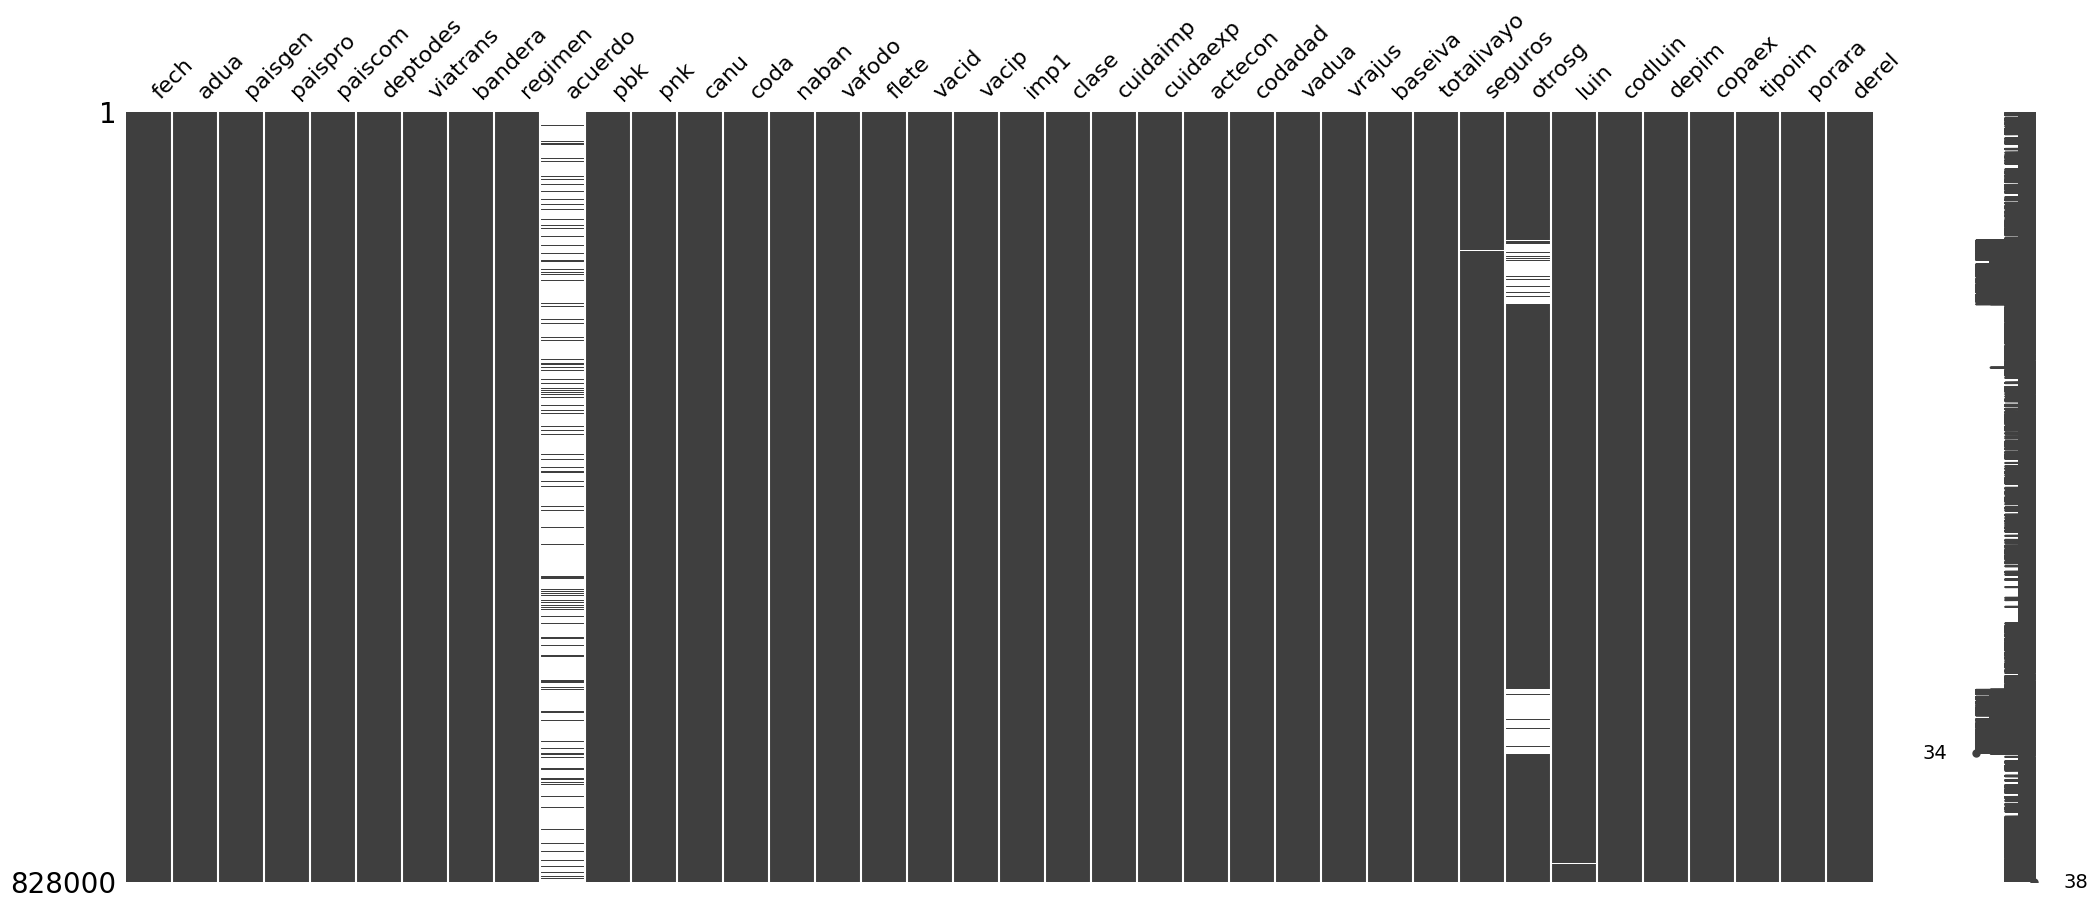

In [ ]:
msno.matrix(dfimp24)

In [ ]:
# Visualización de histogramas para variables numéricas
dfimp24.hist(figsize=(40, 20), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las variables numéricas")
plt.show()

In [ ]:
# Matriz de correlación
correlation_matrix = dfimp24.corr(numeric_only=True)
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 6})
plt.title("Matriz de Correlación")
plt.show()